In [ ]:
import numpy as np
import os
import tensorflow
import cv2
import keras
import matplotlib.pyplot as plt 
import random
from keras.models import Sequential
from tensorflow.keras import layers #python evtl weg


In [ ]:
img_array = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/test/0/PrivateTest_1054527.jpg")

In [9]:
from google.colab import drive
drive.mount('/content/gdrive') 


Mounted at /content/gdrive


In [ ]:
print (img_array)

[[[123 123 123]
  [123 123 123]
  [126 126 126]
  ...
  [ 52  52  52]
  [ 46  46  46]
  [ 43  43  43]]

 [[116 116 116]
  [115 115 115]
  [116 116 116]
  ...
  [ 52  52  52]
  [ 49  49  49]
  [ 51  51  51]]

 [[105 105 105]
  [107 107 107]
  [109 109 109]
  ...
  [ 57  57  57]
  [ 57  57  57]
  [ 60  60  60]]

 ...

 [[ 96  96  96]
  [ 98  98  98]
  [ 97  97  97]
  ...
  [  1   1   1]
  [  2   2   2]
  [  3   3   3]]

 [[ 87  87  87]
  [ 90  90  90]
  [ 90  90  90]
  ...
  [  1   1   1]
  [  2   2   2]
  [  1   1   1]]

 [[ 78  78  78]
  [ 81  81  81]
  [ 84  84  84]
  ...
  [  4   4   4]
  [  4   4   4]
  [  3   3   3]]]


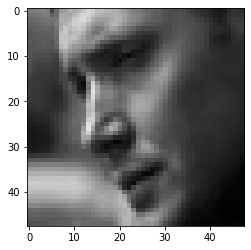

In [ ]:
plt.imshow(img_array)
plt.show()

In [ ]:
dataset = "/content/gdrive/MyDrive/Colab Notebooks/test"
classes = ["0", "1", "2", "3"]

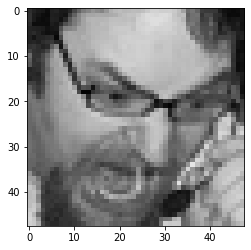

In [ ]:
for category in classes:
    path = os.path.join(dataset, category)
    ImgsInCategory = os.listdir(path)
    for img in ImgsInCategory:
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

In [ ]:
img_size = 224

In [ ]:
new_array = cv2.resize(img_array, (img_size, img_size))

(224, 224, 3)


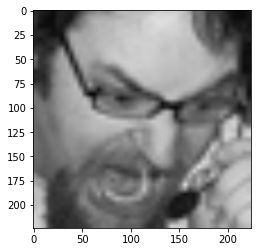

In [ ]:
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
print(new_array.shape)
plt.show()

In [ ]:
training_data = []


In [ ]:
def create_training_data():
    for category in classes:
        path = os.path.join(dataset, category)
        imgs_in_category = os.listdir(path)
        for img in imgs_in_category:
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, category])
            except Exception as e:
                pass


In [ ]:
create_training_data()

In [ ]:
random.shuffle(training_data)
X = []  # data/feature
Y = []  # label

for features, label in training_data:
    X.append(features)
    Y.append(label)

# converting to 4 dimensions
X = np.array(X).reshape(-1, img_size, img_size, 3)
X = X / 255.0  ##normalize with skikit learn but for now it is ok (divide by maximal number to normalize)


In [ ]:
print(X.dtype)
print(Y.dtype)
#Y = [int(x) for x in Y]
print(Y)
print(type(Y))
print(type(Y[0]))
print(type(X[0]))
Y = np.array(Y)
print(type(X[0]))


float64
int64
[1 3 2 ... 0 2 3]
<class 'numpy.ndarray'>
<class 'numpy.int64'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
model = tensorflow.keras.applications.MobileNetV2()  # model needs rgb and 224 pre trained model

14548992/14536120 [==============================] - 0s 0us/step


In [ ]:
model.summary()


In [ ]:
# transfer learning
base_input = model.layers[0].input
base_output = model.layers[-2].output
print(base_output)

KerasTensor(type_spec=TensorSpec(shape=(None, 1280), dtype=tf.float32, name=None), name='global_average_pooling2d/Mean:0', description="created by layer 'global_average_pooling2d'")


In [ ]:
final_output = layers.Dense(128)(base_output) 
final_output = layers.Activation('relu')(final_output) 
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)  ##my classes are 4, classification layer und somit softmax

new_model = keras.Model(inputs=base_input, outputs=final_output)
##new_model.summary()

new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
##new_model.summary()

##settings for binary classification



In [ ]:
Y = np.array(Y)

In [ ]:
X = tensorflow.stack(X)
Y = tensorflow.stack(Y)

new_model.fit(X, Y, epochs=5)
new_model.save('Final_model_95p07.h5')

Epoch 1/5
157/157 [==============================] - 945s 6s/step - loss: 1.0621 - accuracy: 0.5387
Epoch 2/5
157/157 [==============================] - 940s 6s/step - loss: 0.8686 - accuracy: 0.6270
Epoch 3/5
157/157 [==============================] - 937s 6s/step - loss: 0.7605 - accuracy: 0.6828
Epoch 4/5
157/157 [==============================] - 931s 6s/step - loss: 0.6861 - accuracy: 0.7150
Epoch 5/5
157/157 [==============================] - 925s 6s/step - loss: 0.6391 - accuracy: 0.7472


In [ ]:
new_model.save('Final_model_95p08.h5')